<a href="https://colab.research.google.com/github/ik-okoro/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-exploratory-data-analysis/LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [ ]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

In [1]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0
8,6,aug,sun,92.3,85.3,488,14.7,22.2,29,5.4,0,0
8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0,0
8,6,aug,mon,91.5,145.4,608.2,10.7,8,86,2.2,0,0
8,6,sep,tue,91,129.5,692.6,7,13.1,63,5.4,0,0
7,5,sep,sat,92.5,88,698.6,7.1,22.8,40,4,0,0
7,5,sep,sat,92.5,88,698.6,7.1,17.8,51,7.2,0,0
7,5,sep,sat,92.8,73.2,713,22.6,19.3,38,4,0,0
6,5,aug,fri,63.5,70.8,665.3,0.8,17,72,6.7,0,0
6,5,sep,mon,90.9,126.5,686.5,7,21.3,42,2.2,0,0
6,5,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0,0
6,5,sep,fri,93.3,141.2,713.9,13.9,22.9,44,5.4,0,0
5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,5.4,0,0
8,5,oct,mon,84.9,32.8,664.2,3,16.7,47,4.9,0,0
6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,4,0,0
6,4,apr,sat,86.3,27.4,97.1,5.1,9.3,44,4.5,0,0
6,4,sep,tue,91,12

In [5]:
# Importing required libraries
import numpy as np
import pandas as pd

In [52]:
# Loading the forest fires data set
forest_fires_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"

df_fires = pd.read_csv(forest_fires_url)

df_fires.shape

(517, 13)

In [53]:
df_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [54]:
df_fires.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [55]:
df_fires.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

No missing data and number of columns and rows match up with UCI

In [57]:
# A look at a summary of the data

df_fires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Ranges from numerical description match up with UCI attribute information.

In [58]:
df_fires.describe(exclude="number")

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [ ]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

In [12]:
# Loading the Student Performance Data Set (Math section)

from google.colab import files
uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


In [20]:
# Assign data frame and view shape
df = pd.read_csv("student-mat.csv", sep=";")

print(df.shape)
df.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [17]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


Full Data Set was divided into two sub data sets so can't check the rows match against that. Rows however do match against downloaded math data set

In [22]:
# Confirm no missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No missing values and the data seems to be in order.

In [23]:
# Summarized description of numerical data
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [24]:
# Summarized description of non-numerical data
df.describe(exclude="number")

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [25]:
# Several numerical variable options to choose from
# Decided to go with number of previos class failures

pd.crosstab(df["failures"], [df["school"], df["sex"], df["address"], df["famsize"], df["Pstatus"]])

school    GP                                  ...  MS                              
sex        F                           M      ...   F              M               
address    R           U               R      ...   R   U          R       U       
famsize  GT3     LE3 GT3     LE3     GT3      ... LE3 GT3 LE3    GT3 LE3 GT3 LE3   
Pstatus    A   T   T   A   T   A   T   A   T  ...   T   T   A  T   T   T   T   A  T
failures                                      ...                                  
0          2  14   6  10  85   5  26   1  19  ...   2   5   1  3   3   2   3   0  4
1          1   4   0   1   8   0   6   0   2  ...   0   1   0  0   4   1   0   0  1
2          0   3   0   1   5   0   0   0   2  ...   0   1   0  1   0   0   0   1  0
3          0   1   0   1   3   0   1   0   0  ...   0   0   0  0   2   0   0   0  0

[4 rows x 26 columns]

Looked at certain factors that could contribute to failing a class and had it broken down in one crosstab

In [27]:
# Examine final grade against possible categorical variables that would aid success

pd.crosstab(df["G3"], [df["schoolsup"], df["famsup"], df["paid"], df["nursery"], df["higher"], df["internet"]])

schoolsup no                              ... yes                            
famsup    no                              ...  no yes                        
paid      no                              ... yes  no             yes        
nursery   no             yes              ... yes  no yes          no yes    
higher    no     yes      no     yes      ... yes yes  no yes     yes yes    
internet  no yes  no yes  no yes  no yes  ... yes yes yes  no yes yes  no yes
G3                                        ...                                
0          0   0   1   4   0   3   5   1  ...   0   0   0   0   1   0   0   0
4          0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0
5          0   0   0   0   0   0   0   1  ...   0   1   0   0   0   0   0   1
6          0   0   0   1   0   0   0   0  ...   0   0   0   2   0   0   0   3
7          0   0   1   1   1   0   0   1  ...   0   1   0   0   1   0   0   0
8          0   2   1   0   0   2   0   1  ...   0   0   0   0   1   0   0   4
9          0   1   1   0   0   0   1   3  ...   0   0   0   0   2   0   0   2
10         0   0   0   2   0   2   2   7  ...   1   2   1   1   1   0   1   1
11         0   0   0   1   0   0   3   4  ...   0   1   0   0   2   0   0   3
12         1   0   2   2   0   0   2   4  ...   0   0   0   1   0   1   0   1
13         0   0   0   1   0   0   2   6  ...   0   0   0   0   0   0   1   0
14         0   0   0   1   0   0   2   4  ...   0   0   0   0   0   0   0   1
15         0   0   1   2   0   0   0   6  ...   0   1   0   0   0   0   0   0
16         0   0   0   2   0   0   0   4  ...   0   0   0   0   0   0   0   0
17         0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0
18         0   0   0   0   0   0   1   1  ...   0   0   0   0   0   0   0   0
19         0   0   0   0   0   0   0   3  ...   0   0   0   0   0   0   0   0
20         0   0   0   0   0   0   0   1  ...   0   0   0   0   0   0   0   0

[18 rows x 34 columns]

In [28]:
# Two factor crosstab to examine workday alcohol consumption vs Parents status
# Looking at parent status as an effect so make that the index

pd.crosstab(df["Pstatus"], df["Dalc"])

Dalc,1,2,3,4,5
Pstatus,,,,,
A,29,5,4,2,1
T,247,70,22,7,8


Way higher size for students whose parents are together so can't make any reasoable inference from the table.

## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

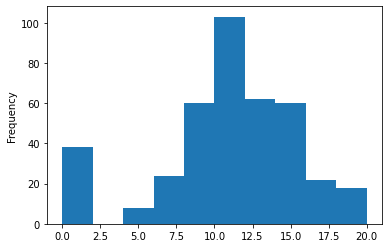

In [30]:
# Histogram of final grade
# Should show an approximately normal distribution

df["G3"].plot.hist();

Notice a good amount of outliers performing badly in math.

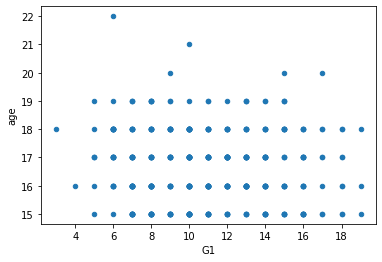

In [34]:
# Scatterplot comparing students first grade with age

df.plot.scatter("G1", "age");

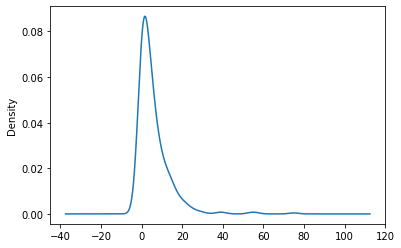

In [35]:
# Density plot to show probability of absences

df["absences"].plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [37]:
# Examining the final test scores between the two schools

pd.crosstab(df["G3"], df["school"])

school,GP,MS
G3,,
0,34,4
4,1,0
5,5,2
6,14,1
7,7,2
8,28,4
9,24,4
10,46,10
11,43,4


Way more sample side for Gabirel Pereira so examine by gender instead

In [38]:
pd.crosstab(df["G3"], df["sex"])

sex,F,M
G3,,
0,23,15
4,1,0
5,3,4
6,13,2
7,4,5
8,14,18
9,17,11
10,30,26
11,29,18


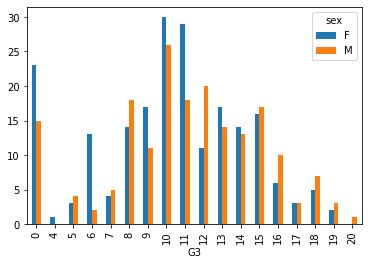

In [39]:
pd.crosstab(df["G3"], df["sex"]).plot(kind = "bar");

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [40]:
# Exploring a test data set
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc
vhigh,vhigh,2,2,med,high,unacc
vhigh,vhigh,2,2,big,low,unacc
vhigh,vhigh,2,2,big,med,unacc
vhigh,vhigh,2,2,big,high,unacc
vhigh,vhigh,2,4,small,low,unacc
vhigh,vhigh,2,4,small,med,unacc
vhigh,vhigh,2,4,small,high,unacc
vhigh,vhigh,2,4,med,low,unacc
vhigh,vhigh,2,4,med,med,unacc
vhigh,vhigh,2,4,med,high,unacc
vhigh,vhigh,2,4,big,low,unacc
vhigh,vhigh,2,4,big,med,unacc
vhigh,vhigh,2,4,big,high,unacc
vhigh,vhigh,2,more,small,low,unacc
vhigh,vhigh,2,more,small,med,unacc
vhigh,vhigh,2,more,small,high,unacc
vhigh,vhigh,2,more,med,low,unacc
vhigh,vhigh,2,more,med,med,unacc
vhigh,vhigh,2,more,med,high,unacc
vhigh,vhigh,2,more,big,low,unacc
vhigh,vhigh,2,more,big,med,unacc
vhigh,vhigh,2,more,big,high,unacc
vhigh,vhigh,3,2,small,low,unacc
vhigh,vhigh,3,2,small,med,unacc
vhigh,vhigh,3,2,small,high,unacc
vhigh,vhigh,3,2,med,low,unacc
vhigh,vhi

In [42]:
# Assign to test data frame

cars_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

df_test = pd.read_csv(cars_data_url, names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "Class Values"])

print(df_test.shape)
df_test.head()

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,Class Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [44]:
df_test.tail()

,buying,maint,doors,persons,lug_boot,safety,Class Values
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [45]:
df_test.isnull().sum()

buying          0
maint           0
doors           0
persons         0
lug_boot        0
safety          0
Class Values    0
dtype: int64

In [47]:
df_test.describe()

,buying,maint,doors,persons,lug_boot,safety,Class Values
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,4,more,small,high,unacc
freq,432,432,432,576,576,576,1210


Noticed it default set exclude parameter in describe as "number" since there's not strictly integer set of values

In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1728 non-null   object
 1   maint         1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   lug_boot      1728 non-null   object
 5   safety        1728 non-null   object
 6   Class Values  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


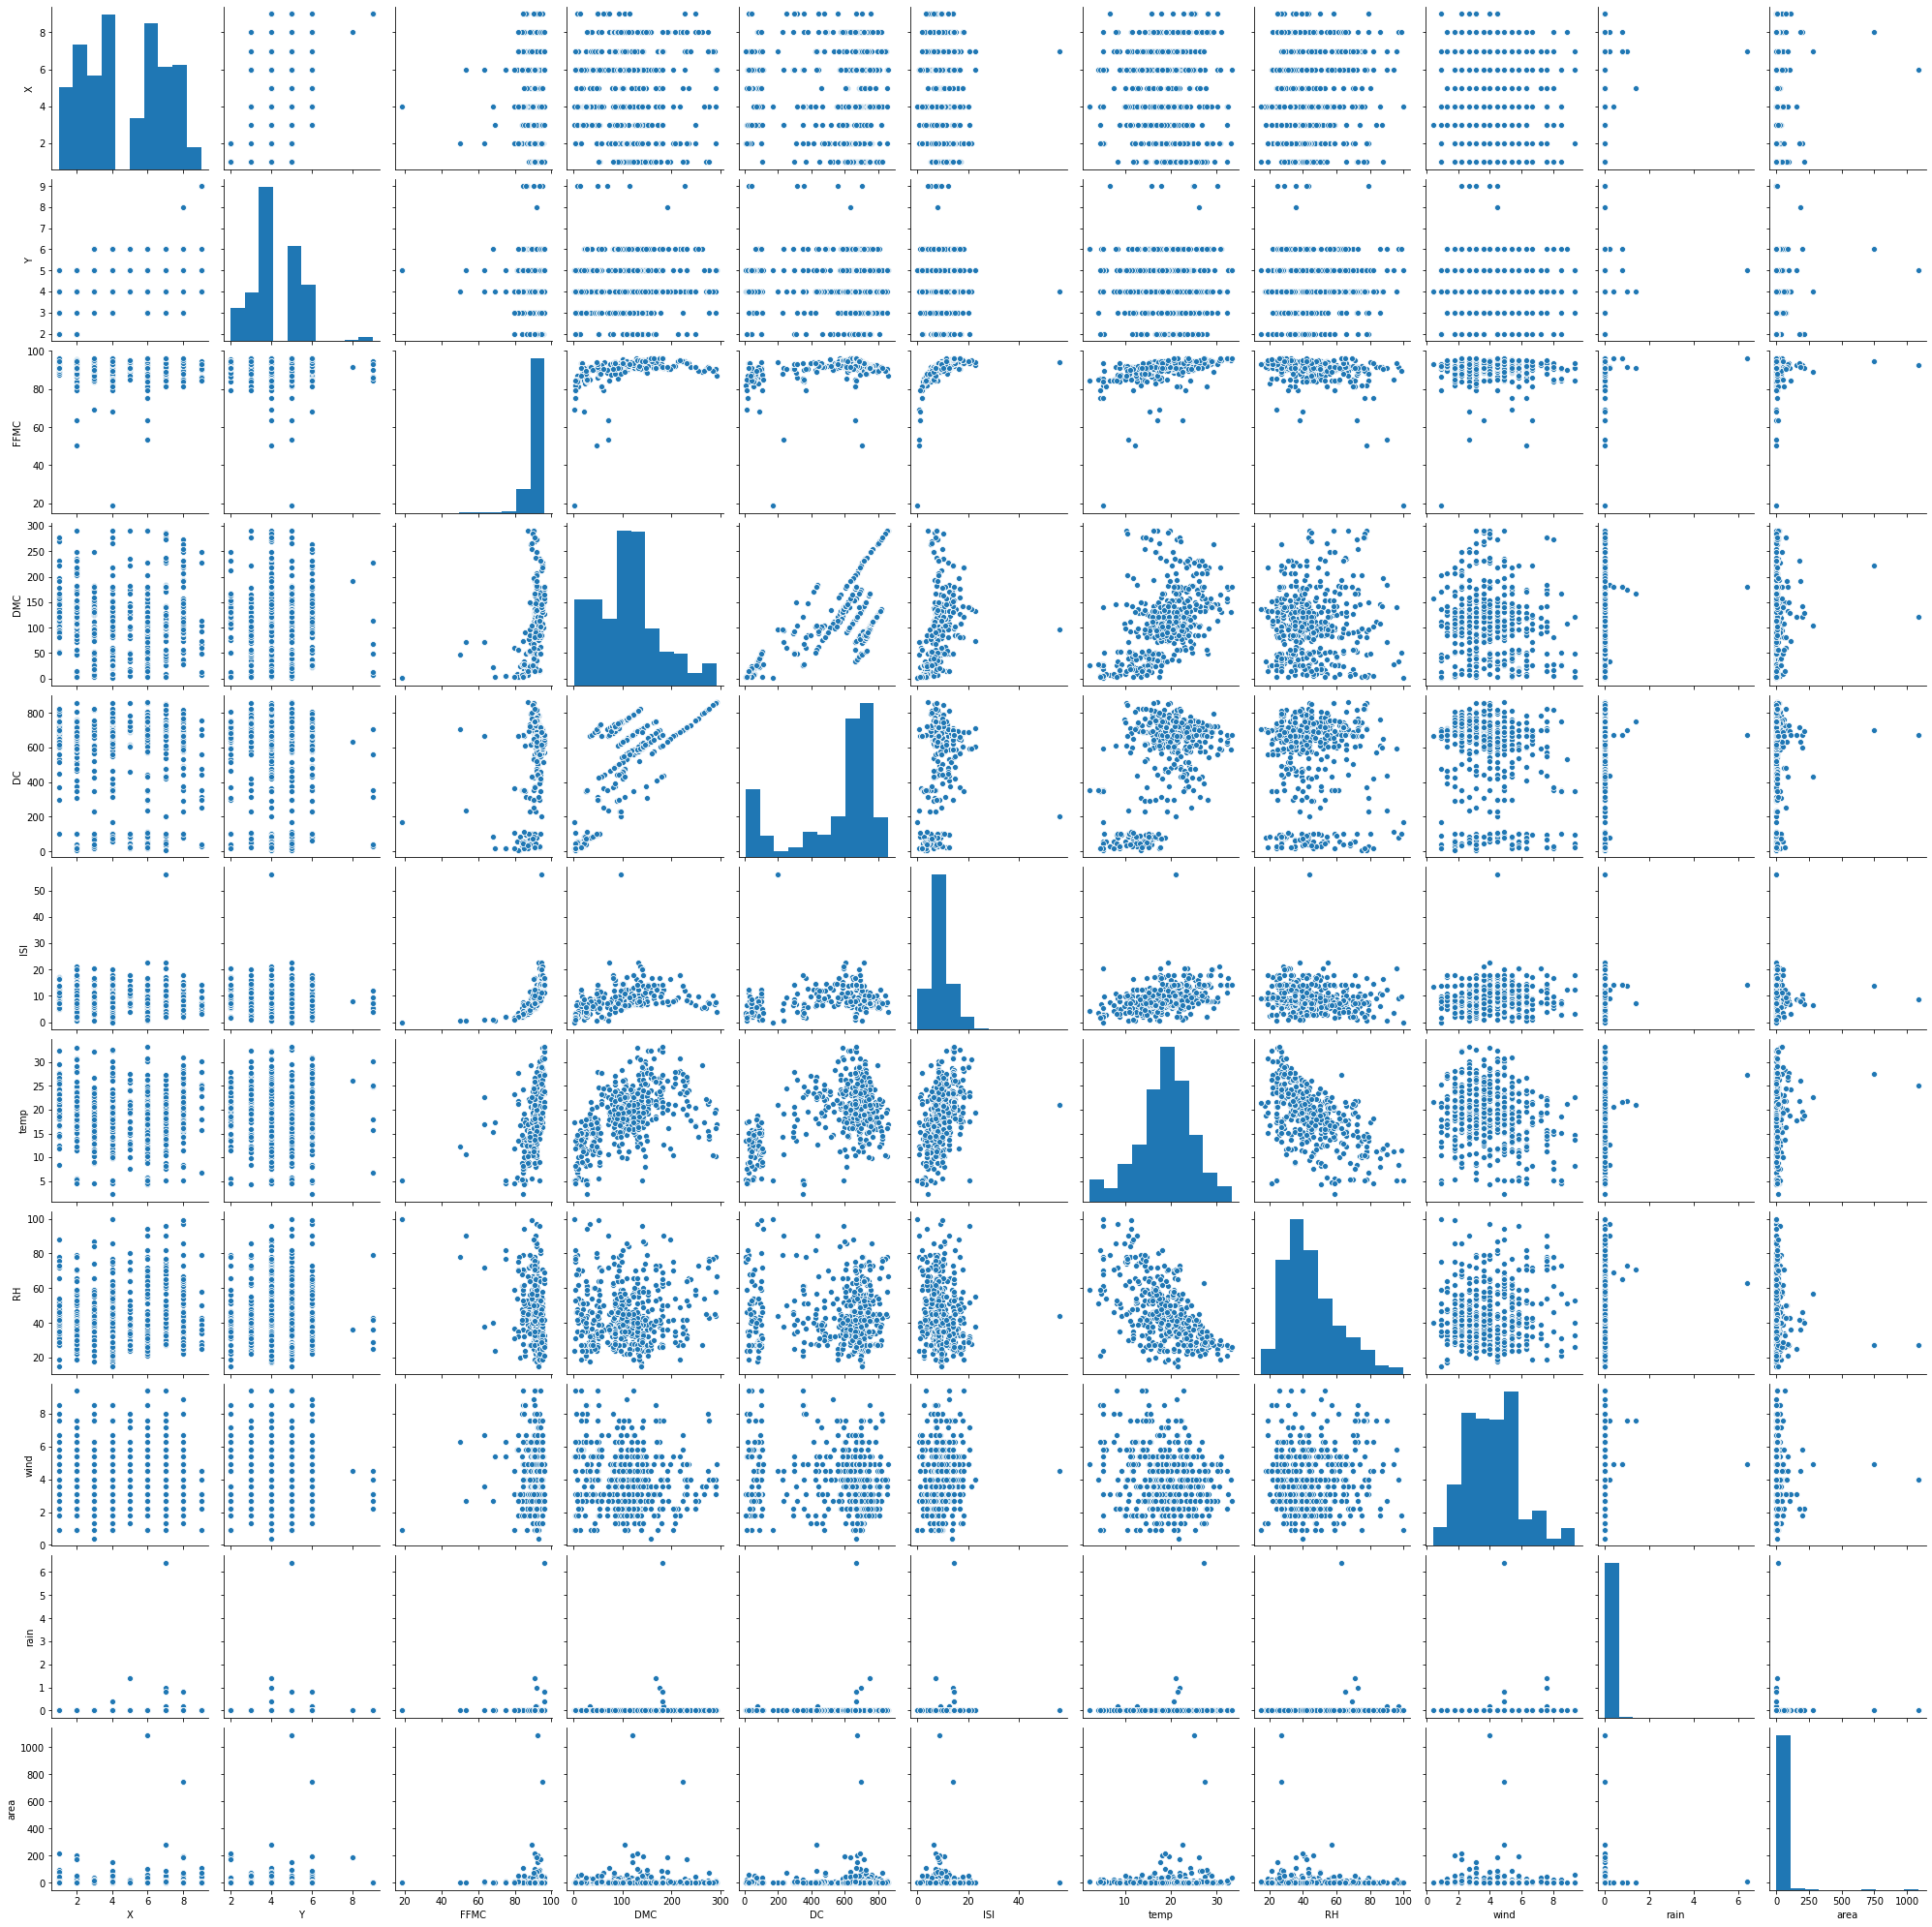

In [60]:
# Test seaborn pairplot
import seaborn as sns
sns.pairplot(df_fires);

Honestly amazing, wow

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

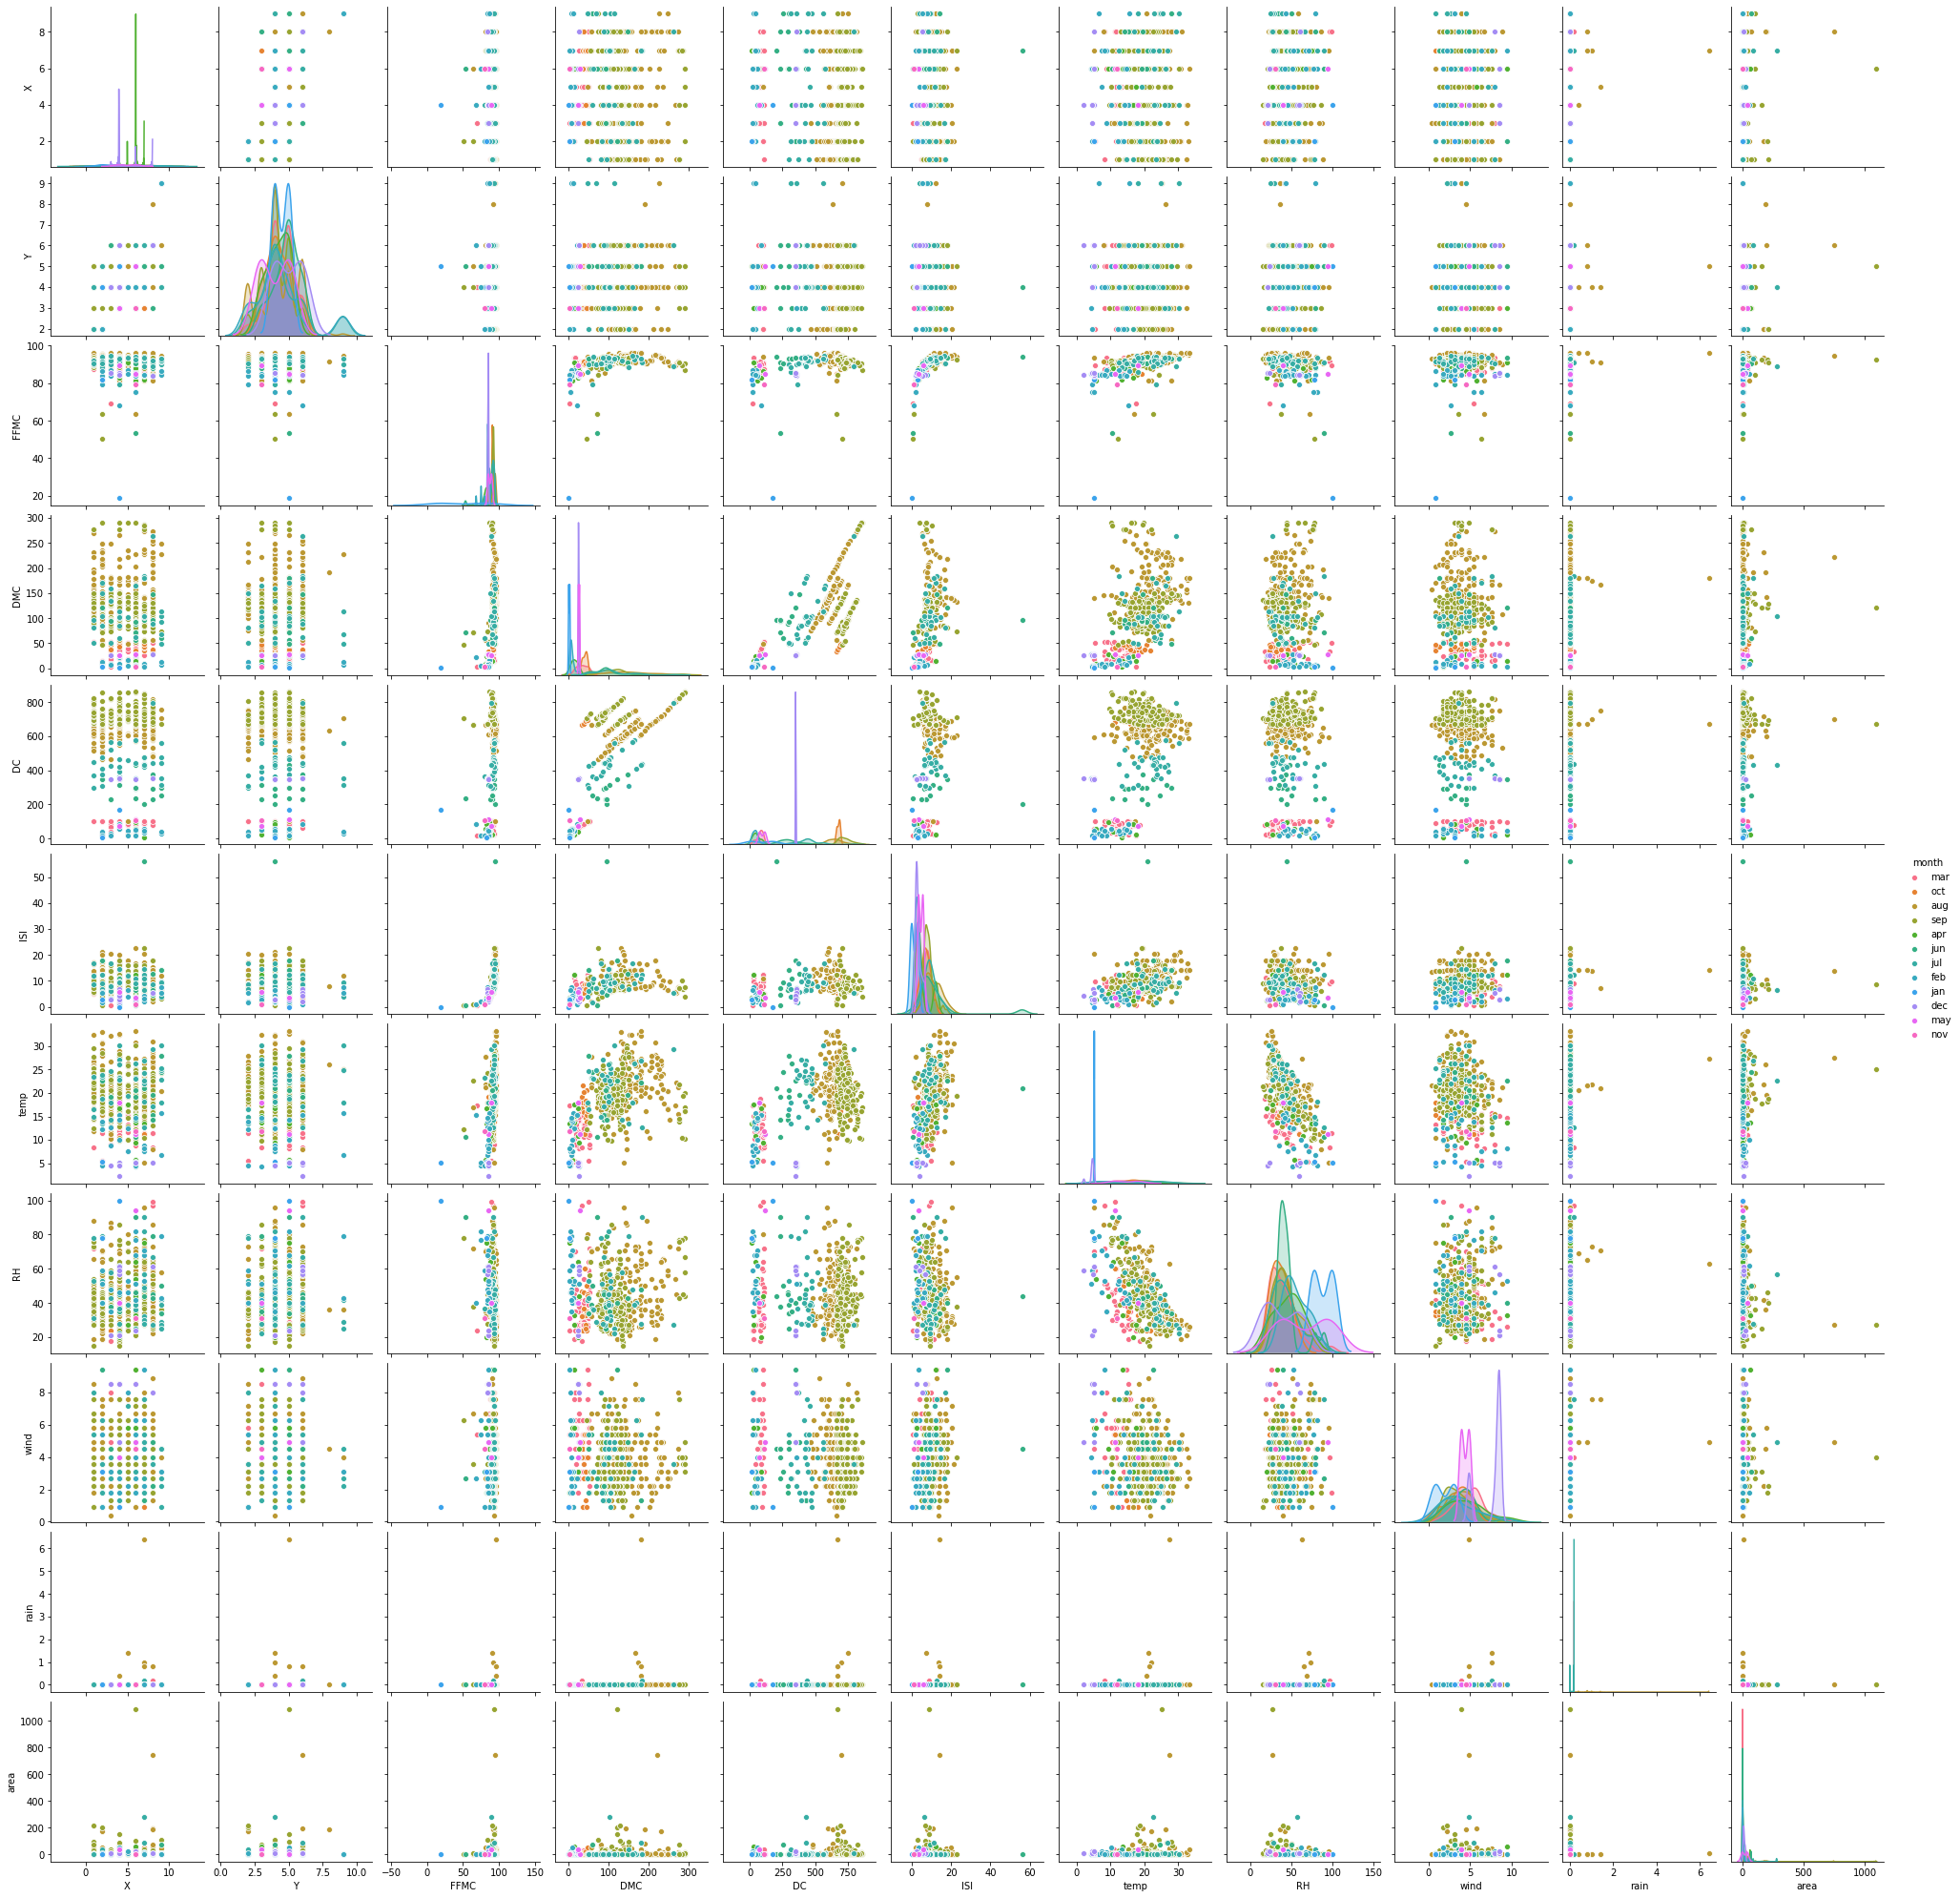

In [61]:
# Test adding a categorical variable colour
# Months in this case

sns.pairplot(df_fires, hue = "month");

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


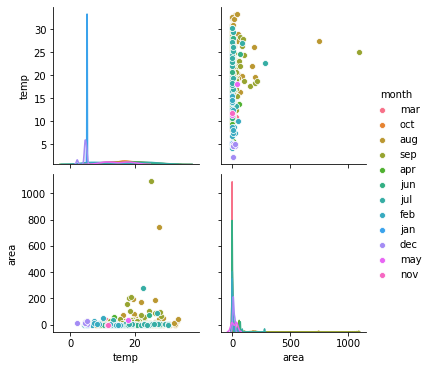

In [62]:
# Looking at just the temperature and area subsets
# Ignoring the fire codes

sns.pairplot(df_fires, hue="month", vars=["temp", "area"]);

In [63]:
# Converting wind and temperatures from fires data set to categorical variables
# Not really interested in relative weights so use cut not qcut

pd.cut(df_fires["wind"], 3, labels=["weak", "fair", "strong"])

0      strong
1        weak
2        weak
3        fair
4        weak
        ...  
512      weak
513      fair
514    strong
515      fair
516      fair
Name: wind, Length: 517, dtype: category
Categories (3, object): [weak < fair < strong]

In [65]:
pd.cut(df_fires["temp"], 3, labels=["fair", "warm", "hot"])

0      fair
1      warm
2      warm
3      fair
4      fair
       ... 
512     hot
513    warm
514    warm
515     hot
516    fair
Name: temp, Length: 517, dtype: category
Categories (3, object): [fair < warm < hot]

In [67]:
# Showing a crosstab of the categorical wind speeds against relative humidity

pd.crosstab(df_fires["RH"], pd.cut(df_fires["temp"], 3, labels=["fair", "warm", "hot"]))

temp,fair,warm,hot
RH,,,
15,0,2,0
17,0,1,0
18,0,1,0
19,0,3,1
20,0,1,0
...,...,...,...
94,1,0,0
96,1,0,0
97,1,0,0


Wondering if there's a neater way to make the crosstab after already making a cut in an earlier code block? All in all, a really neat effect